In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# **데이터 탐색**

In [ ]:
#df.drop(columns='id', inplace=True)

In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df[df['bmi'].isnull() == True]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [ ]:
#결측치 처리 -> 여자는 여자 bmi평균, 남자는 남자 bmi 평균 (여자+남자+Others = df)
mean_female = df[df['gender'] == 'Female'].bmi.mean().round(2)
mean_male = df[df['gender'] == 'Male'].bmi.mean().round(2)

In [ ]:
print(mean_female, mean_male)

29.07 28.65


In [ ]:
df1 = df[df['gender'] == 'Female'].fillna(mean_female).reset_index().drop(columns='index')
df2 = df[df['gender'] == 'Male'].fillna(mean_male).reset_index().drop(columns='index')
df = pd.concat([df1, df2], axis=0).reset_index().drop(columns='index')

In [ ]:
#gender의 Others는 결측치로 간주
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.07,never smoked,1
1,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
2,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1
3,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.80,never smoked,1
4,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,29.07,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,64520,Male,68.0,0,0,Yes,Self-employed,Urban,91.68,40.80,Unknown,0
5105,579,Male,9.0,0,0,No,children,Urban,71.88,17.50,Unknown,0
5106,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,28.65,smokes,0
5107,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.30,never smoked,0


In [ ]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# **EDA**


---
1. 상관관계 시각화

2. 연령대별 heart_disease 현황

3. 연령대별 평균 avg_glucose_level 현황

4. 연령대별 평균 bmi 수치 현황

5. 성별에 따른 heart_disease 현황

6. 성별, 연령대별 흡연 현황 


In [ ]:
df.drop(columns='id', inplace=True)

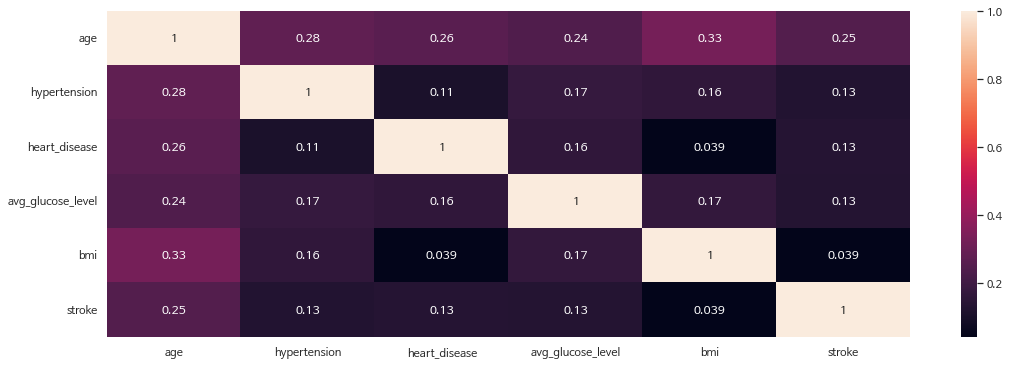

In [ ]:
#수치형 변수 상관분석
plt.figure(figsize=(18,6))
sns.heatmap(df.corr(), annot=True)

**대체적으로 나이 변수와 다른 변수 간의 상관 관계가 높음을 알 수 있음**

In [ ]:
#연령범주별 heart_disease 시각화
df['age'].describe()

count    5109.000000
mean       43.229986
std        22.613575
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

In [ ]:
df[df['age'] == 0.08]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
941,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0
4376,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0


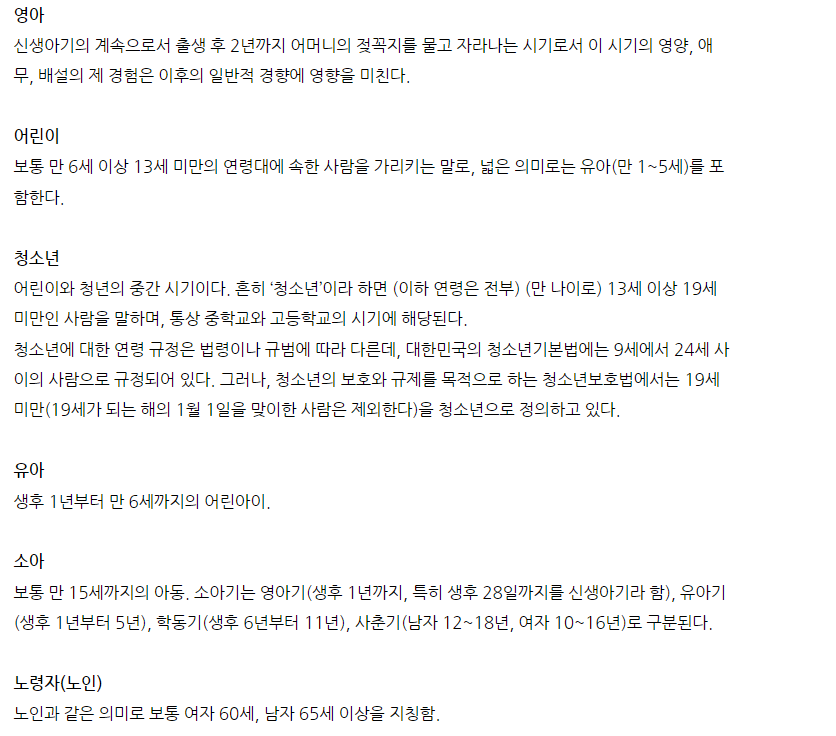



---
영유아의 데이터도 존재하기 때문에, 검색을 통해 도출된 나이 기준에 따라 범주를 구분할 것


In [ ]:
df['연령범주'] = ""

df.loc[df['age'] < 7, '연령범주'] = '유아'
df.loc[(df['age'] >= 7) & (df['age'] < 13), '연령범주'] = '어린이'
df.loc[(df['age'] >= 13) & (df['age'] < 20), '연령범주'] = '청소년'
df.loc[(df['age'] >= 20) & (df['age'] < 60) & (df['gender'] == 'Female'), '연령범주'] = '성인'
df.loc[(df['age'] >= 20) & (df['age'] < 65) & (df['gender'] == 'Male'), '연령범주'] = '성인'
df.loc[(df['age'] >= 60) & (df['gender'] == 'Female'), '연령범주'] = '노인'
df.loc[(df['age'] >= 65) & (df['gender'] == 'Male'), '연령범주'] = '노인'

df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,연령범주
0,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.07,never smoked,1,노인
1,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1,성인
2,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1,노인
3,Female,69.0,0,0,No,Private,Urban,94.39,22.80,never smoked,1,노인
4,Female,59.0,0,0,Yes,Private,Rural,76.15,29.07,Unknown,1,성인
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,Male,68.0,0,0,Yes,Self-employed,Urban,91.68,40.80,Unknown,0,노인
5105,Male,9.0,0,0,No,children,Urban,71.88,17.50,Unknown,0,어린이
5106,Male,40.0,0,0,Yes,Private,Rural,83.94,28.65,smokes,0,성인
5107,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.30,never smoked,0,노인


Text(0.5, 1.0, '연령대별 heart_disease 현황')

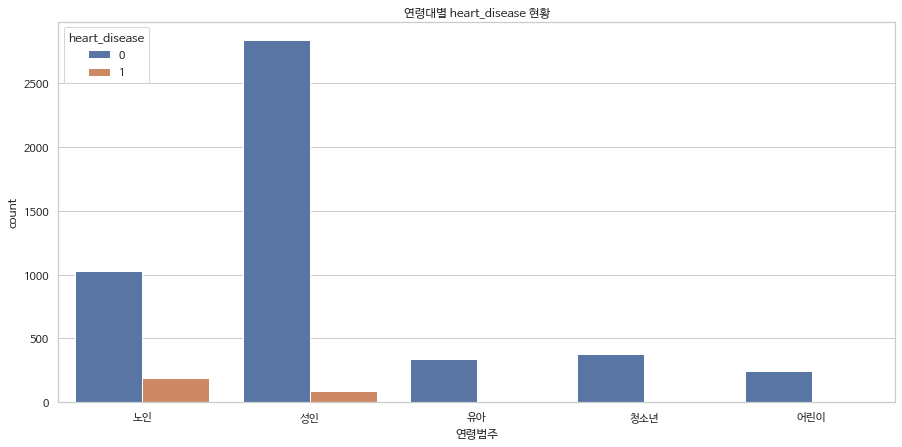

In [ ]:
plt.rc('font', family='NanumBarunGothic') 
sns.set_theme(style="whitegrid", font='NanumBarunGothic')
plt.figure(figsize=(15,7))
ax = sns.countplot(x='연령범주', hue='heart_disease', data=df)
ax.set_title('연령대별 heart_disease 현황')

In [ ]:
#연령대별 평균 avg_glucose_level 현황
df1 = pd.DataFrame(df.groupby('연령범주')['avg_glucose_level'].mean()).round(1)
df1

,avg_glucose_level
연령범주,
노인,121.9
성인,103.4
어린이,93.6
유아,94.0
청소년,95.5


Text(0.5, 1.0, '연령대별 avg_glucose_level 평균값')

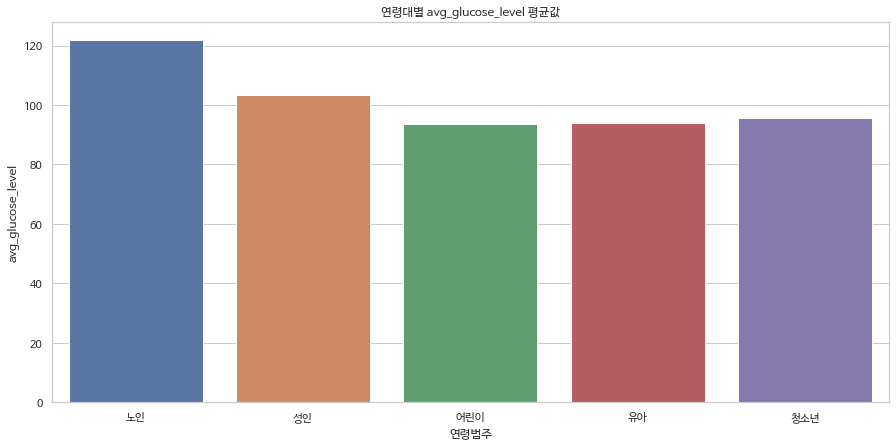

In [ ]:
plt.rc('font', family='NanumBarunGothic') 
sns.set_theme(style="whitegrid", font='NanumBarunGothic')
plt.figure(figsize=(15,7))
ax = sns.barplot(x=df1.index, y='avg_glucose_level', errwidth=0, data=df1)
ax.set_title('연령대별 avg_glucose_level 평균값')

Text(0.5, 1.0, '연령대별 bmi 평균값')

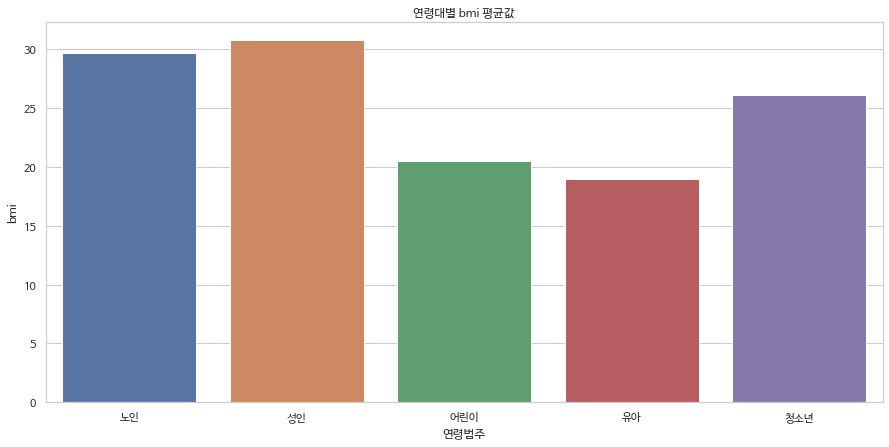

In [ ]:
# 연령범주별 bmi 평균 수치 시각화
df2 = pd.DataFrame(df.groupby('연령범주')['bmi'].mean()).round(1)

plt.rc('font', family='NanumBarunGothic') 
sns.set_theme(style="whitegrid", font='NanumBarunGothic')
plt.figure(figsize=(15,7))
ax = sns.barplot(x=df2.index, y='bmi', errwidth=0, data=df2)
ax.set_title('연령대별 bmi 평균값')

Text(0.5, 1.0, '연령대별 smoking 현황')

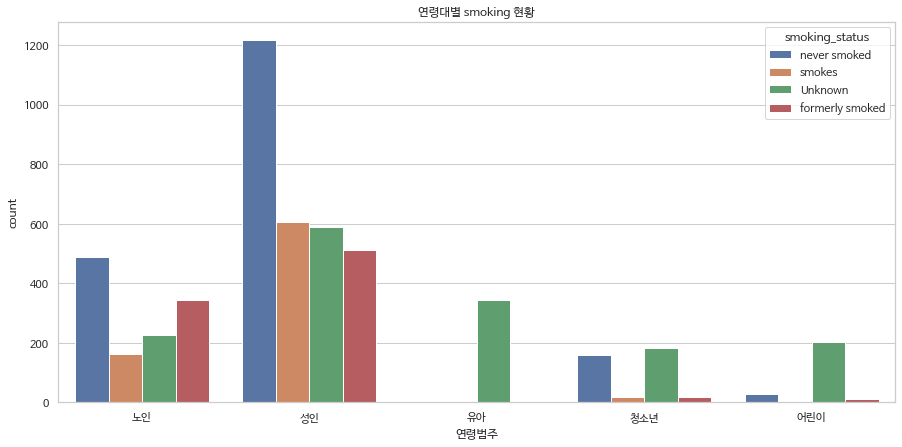

In [ ]:
# 연령범주별 smoking 현황 시각화
sns.set_theme(style="whitegrid", font='NanumBarunGothic')
plt.figure(figsize=(15,7))
ax = sns.countplot(x='연령범주', hue='smoking_status', data=df)
ax.set_title('연령대별 smoking 현황')

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


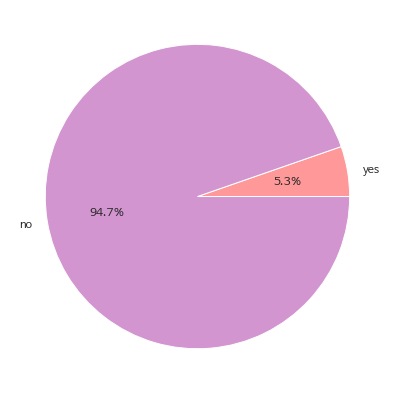

In [ ]:
# smoking하는 사람들의 stroke 현황
df3 = df[df['smoking_status'] == 'smokes']
df3.loc[df3['stroke'] == 1, 'stroke'] = 'yes'
df3.loc[df3['stroke'] == 0, 'stroke'] = 'no'

color = ['#ff9999','#d395d0']
data = [len(df3[df3['stroke'] == 'yes']) / len(df3), len(df3[df3['stroke'] == 'no']) / len(df3)]
label = df3['stroke'].unique().tolist()

plt.figure(figsize=(15,7))

plt.pie(data, labels=label, autopct='%.1f%%', colors = color)
plt.show()

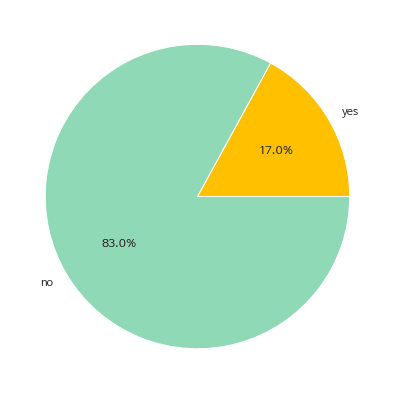

In [ ]:
# 심장병을 가진 사람들의 stroke 현황
df4 = df[df['heart_disease'] == 1]
df4.loc[df4['stroke'] == 1, 'stroke'] = 'yes'
df4.loc[df4['stroke'] == 0, 'stroke'] = 'no'

data = [len(df4[df4['stroke'] == 'yes']) / len(df4), len(df4[df4['stroke'] == 'no']) / len(df4)]
label = df4['stroke'].unique().tolist()
color = ['#ffc000', '#8fd9b6']

plt.figure(figsize=(15,7))

plt.pie(data, labels=label, autopct='%.1f%%', colors = color)
plt.show()

**담배를 피는 사람보다 심장병을 가진 사람이 발작을 일으킬 확률이 더 높음**

# **모델링**


---
  

1) RandomForest


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

***데이터 전처리***

In [ ]:
df.drop(columns = '연령범주', inplace=True)

In [ ]:
Y = df['stroke']
df.drop(columns='stroke', inplace=True)

#범주형 -> 연속형 변환
df = pd.get_dummies(df)
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,61.0,0,0,202.21,29.07,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
1,49.0,0,0,171.23,34.40,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
2,79.0,1,0,174.12,24.00,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
3,69.0,0,0,94.39,22.80,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0
4,59.0,0,0,76.15,29.07,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,68.0,0,0,91.68,40.80,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0
5105,9.0,0,0,71.88,17.50,0,1,1,0,0,0,0,0,1,0,1,1,0,0,0
5106,40.0,0,0,83.94,28.65,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1
5107,82.0,1,0,71.97,28.30,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0


In [ ]:
#train, test 분리

train_x, val_x, train_y, val_y = train_test_split(df, Y, test_size=0.3, shuffle=True)
print(train_x.shape, train_y.shape)
print(val_x.shape, val_y.shape)

(3576, 20) (3576,)
(1533, 20) (1533,)


In [ ]:
#스케일링 
scaler = MinMaxScaler()

# train 데이터 minmax 스케일링
x_train = pd.DataFrame(scaler.fit_transform(train_x))
x_train.columns = train_x.columns


# test 데이터 minmax -> transform만 수행
x_test = pd.DataFrame(scaler.transform(val_x))
x_test.columns = val_x.columns

***모델1_RandomForestClassifier***

In [ ]:
#gridsearch 사용X
model1 = RandomForestClassifier()

model1.fit(x_train, train_y)


array([2.39782504e-01, 2.97650825e-02, 2.58956181e-02, 2.53412679e-01,
       2.24378054e-01, 1.95758840e-02, 2.07738572e-02, 1.20225013e-02,
       9.76238832e-03, 1.31100548e-02, 1.11090412e-05, 1.95978458e-02,
       1.90136538e-02, 9.82691275e-04, 2.14396982e-02, 1.89532339e-02,
       1.52837824e-02, 1.80657675e-02, 1.90001247e-02, 1.91734702e-02])

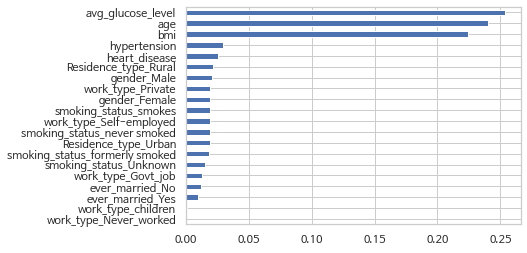

In [ ]:
importance = pd.Series(model1.feature_importances_, x_train.columns)

%matplotlib inline
importance.sort_values().plot.barh()

In [ ]:
from sklearn.metrics import accuracy_score

pred = model1.predict(x_test)
print('정확도 : ', accuracy_score(pred, val_y))

정확도 :  0.9445531637312459


In [ ]:
#gridsearch 사용O
from sklearn.model_selection import GridSearchCV

param = {
    'n_estimators' : [100, 200, 300],
    'max_depth' : [5, 10, 15, 20],
    'min_samples_leaf' : [6, 12, 18],
    'min_samples_split' : [5, 10, 15]
}

model1_2 = RandomForestClassifier(random_state=1, n_jobs=-1)
grid_cv = GridSearchCV(model1_2, param_grid=param, cv=5, n_jobs=-1)
grid_cv.fit(x_train, train_y)

print('최적의 파라미터 : ', grid_cv.best_params_)
print('제일 높은 정확도 : ', grid_cv.best_score_)

최적의 파라미터 :  {'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 5, 'n_estimators': 100}
제일 높은 정확도 :  0.9521815056451928


In [ ]:
model1_2 = RandomForestClassifier(n_estimators = 100, max_depth = 5,
                                  min_samples_leaf = 6, min_samples_split = 5, random_state = 0)

model1_2.fit(x_train, train_y)
pred2 = model1_2.predict(x_test)
print('grid_cv 후 정확도 : ', accuracy_score(pred2, val_y))

grid_cv 후 정확도 :  0.949119373776908
